# EDA notebook
*by Max*

In this notebook I'll will do a general EDA on the data.

We start with importing the modules and loading the data.

In [114]:
# import the needed modules
import numpy as np
import pandas as pd
import math

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import plotting modules and style
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', palette='crest', font='helvetica')
cmap = sns.color_palette('crest', as_cmap=True)
sns.set(rc={"figure.dpi":300})
sns.set(rc = {"figure.figsize":(6,3)})

In [22]:
# Set the directory of the data 
OUTPUT_DIR = '../data'
# Load the base data from the CSV files
df = pd.read_csv(f'{OUTPUT_DIR}/mean_band_perField_perDate.csv')
df.head()

In [24]:
# Convert the date column to datetime object
df['date'] = pd.to_datetime(df['date'])#
# Calculate the days from april as column to get a relative time
df['days_from_april'] =  df['date'] - pd.to_datetime('2017-04-01')
df['days_from_april'] = df['days_from_april'].dt.days

In [25]:
# set a random seed
RSEED = 42
np.random.seed(RSEED)
# split train and test by using the field_ids
train_size = 0.7
n_fields = df['field_id'].nunique()
train_fields = np.random.choice(df['field_id'].unique(), int(n_fields * train_size), replace=False)
test_fields = df['field_id'].unique()[~np.in1d(df['field_id'].unique(), train_fields)]
# create data frames for the train and test data
df_train = df[df['field_id'].isin(train_fields)]
df_test = df[df['field_id'].isin(test_fields)]

We can see that we have different means for each of band over all the fields. Also the standard deviation is quiet different. B02, B03, B04, and B08 have higher stds compared to B11 and B12. It also seems like most bands have skewed distributions.

In [26]:
# descriptive statistics for the train data set
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
field_id,3011081.0,61522.439566,35324.479169,1.0,31097.000000,61389.000000,92075.000000,122736.0
label,3011081.0,4.356439,2.181953,1.0,3.000000,4.000000,6.000000,9.0
B02,3011081.0,57.167181,73.011264,0.0,13.312826,21.866667,63.429832,255.0
B03,3011081.0,63.935131,66.920963,0.0,22.855030,34.070255,69.083336,255.0
B04,3011081.0,70.078116,63.047463,0.0,28.795986,47.404408,80.209390,255.0
B08,3011081.0,99.083999,52.963478,0.0,66.943130,83.033540,110.469090,255.0
B11,3011081.0,89.900409,32.147673,0.0,67.625000,88.449440,111.147440,255.0
B12,3011081.0,70.378639,30.275073,0.0,47.898617,68.606064,91.149500,255.0
CLM,3011081.0,87.260245,120.983540,0.0,0.000000,0.000000,255.000000,255.0
days_from_april,3011081.0,135.985744,67.526041,0.0,90.000000,140.000000,195.000000,243.0


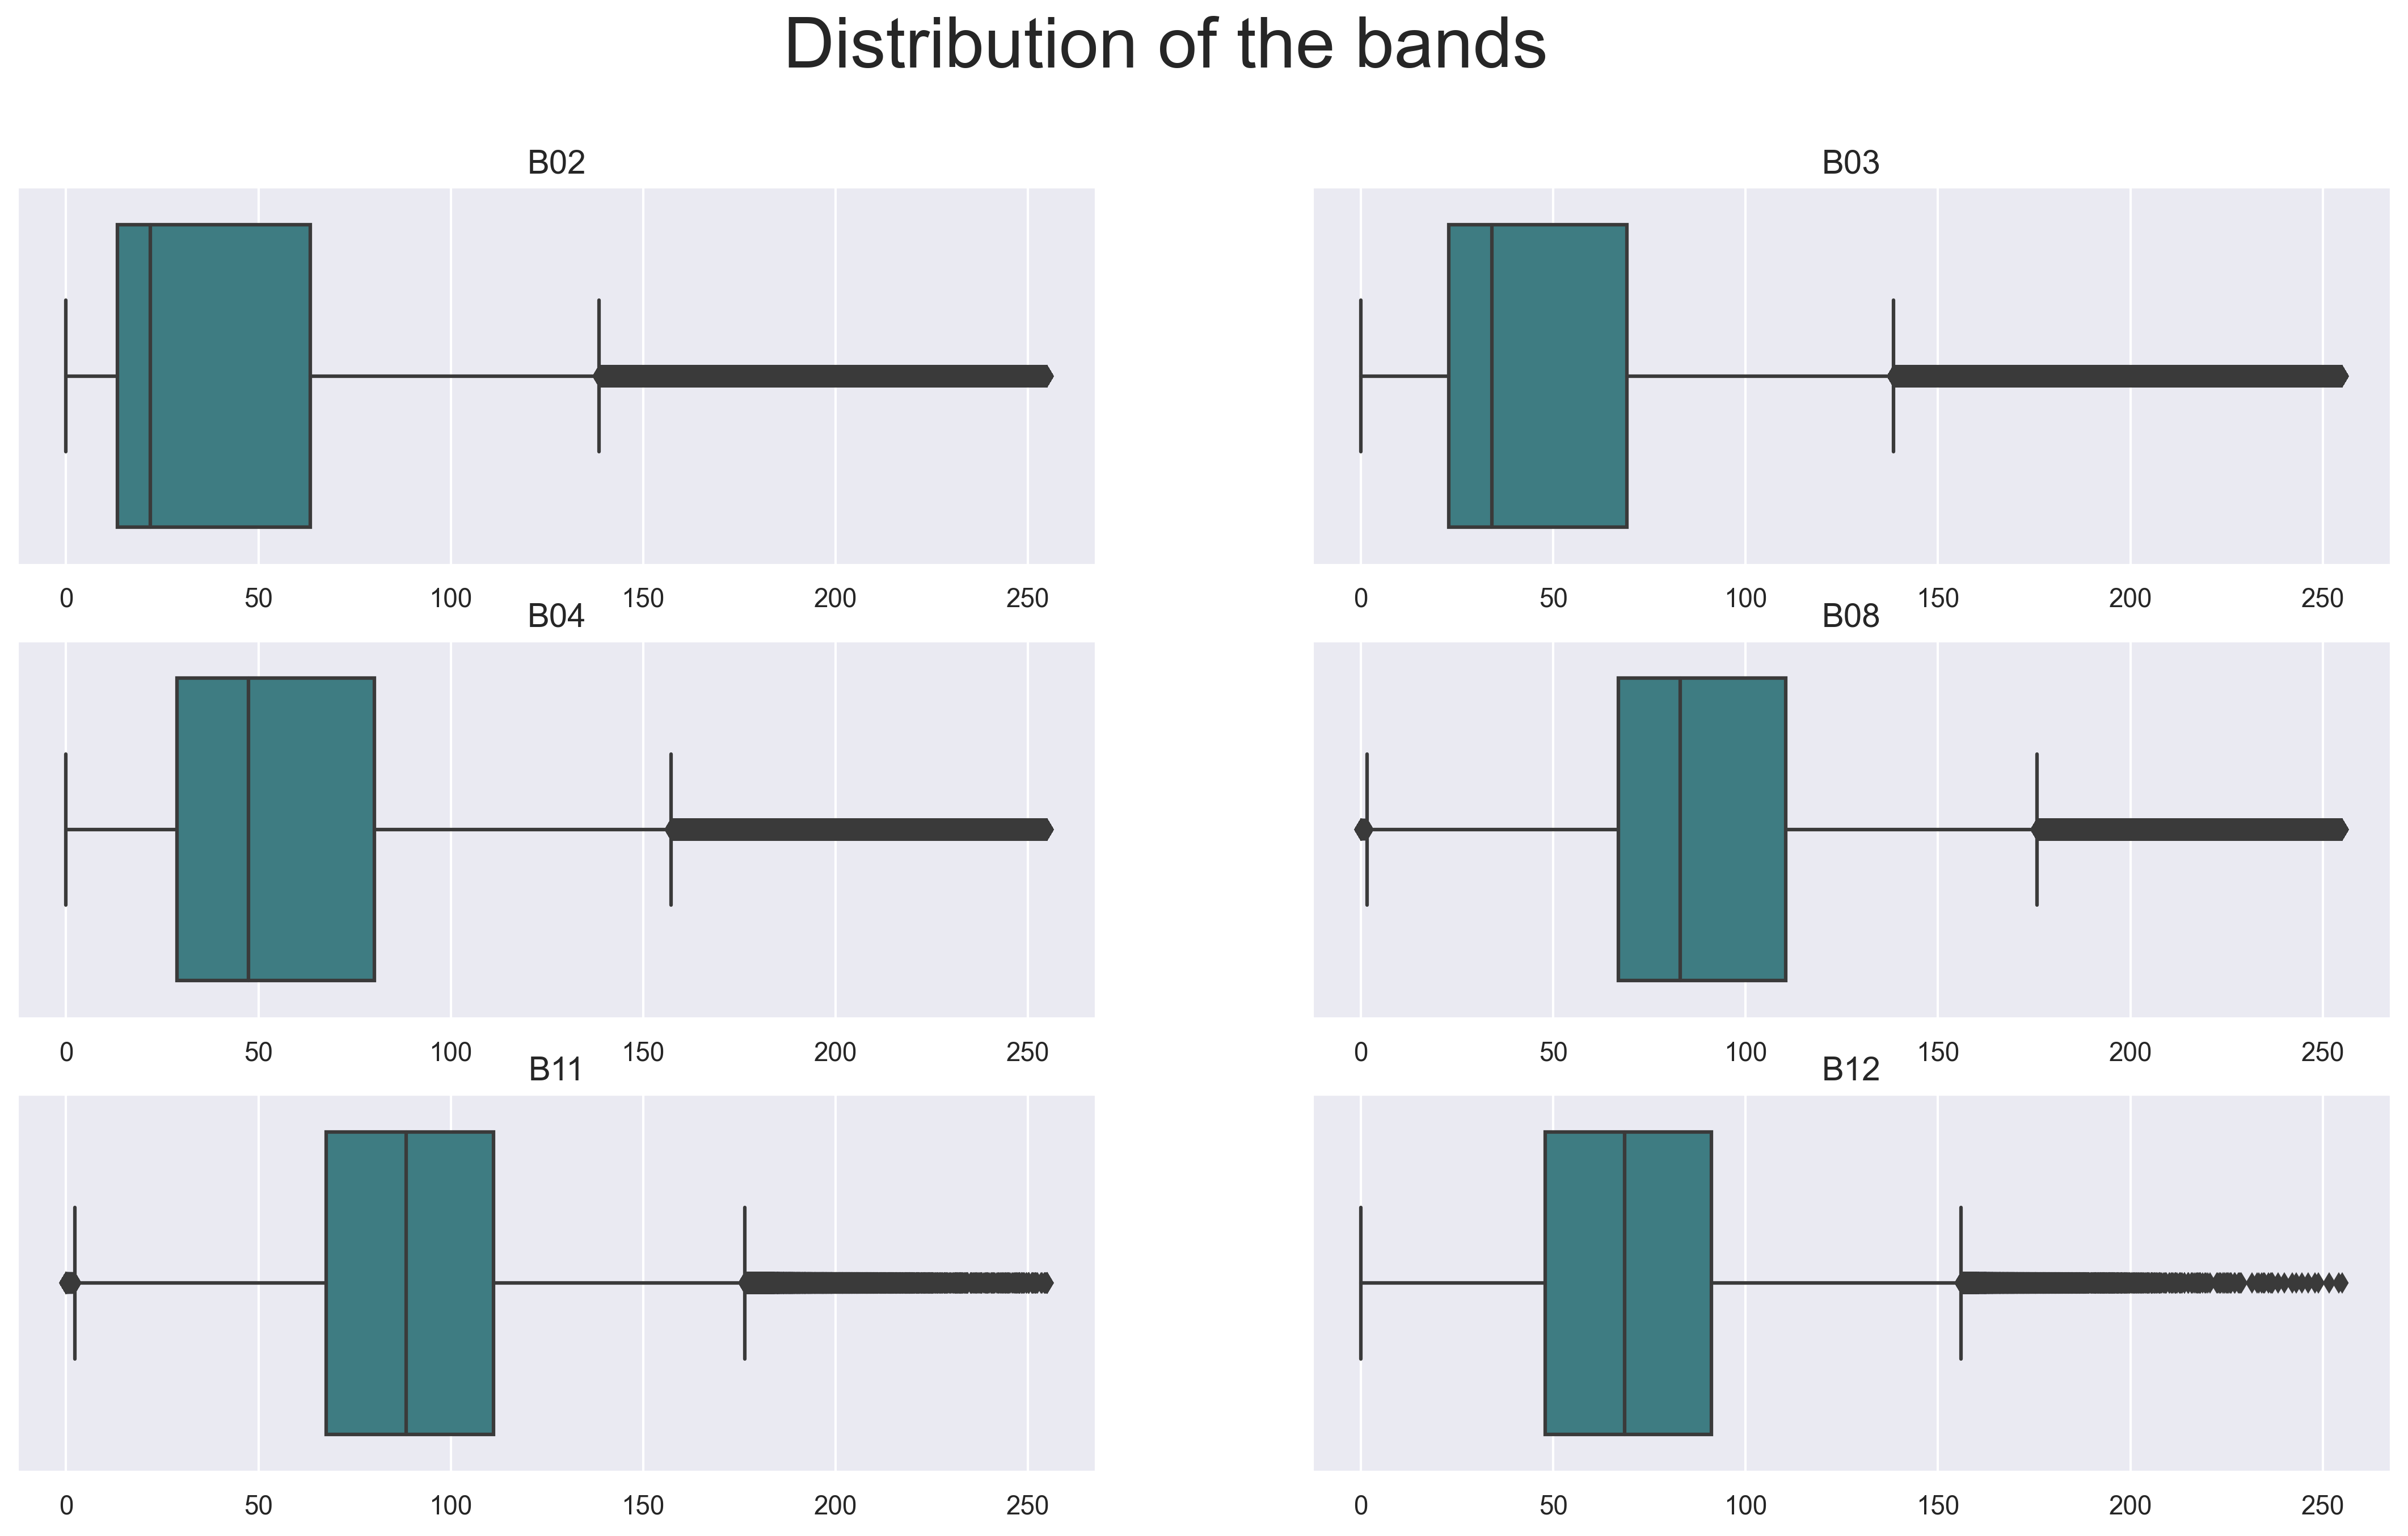

In [116]:
bands = df_train.columns.to_list()
for column in ['field_id', 'label', 'CLM', 'days_from_april', 'date']:
    bands.remove(column)

# set the big figure and axes
fig, axs = plt.subplots(3,math.ceil(len(bands)/3), figsize=(18,10))
fig.suptitle('Distribution of the bands', fontsize = 30)

# plot the different bands on the axes
for band, ax in zip(bands, axs.ravel()):
    sns.boxplot(x=band, hue='label', ax=ax, data=df_train, palette='crest')
    ax.set_title(band, fontsize=14)
    ax.set_xlabel('')
# set one legend for all figures
# fig.legend(
#     labels=sorted(df_train['label'].unique()),
#     handles=axs.ravel().tolist(),
#     loc="center right",
#     borderaxespad=0.2, 
#     title="Label" 
#     )
# make the subplots smaller to create space for the legend space
# plt.subplots_adjust(right=0.95)
plt.show();

The CLM has only values between 0 and 255. And for the overall observations of the training data, there are 24% that are missing the cloud mask information.

In [14]:
df_train.CLM.unique()

array([255.,   0.])

In [28]:
print(f"Number of observations with no CLM info: {df_train[df_train['CLM']==255]['CLM'].count()}")
print(f"Number of overall observations: {df['CLM'].count()}")
print(f"Percent of data without information: {round(df_train[df_train['CLM']==255]['CLM'].count() / df['CLM'].count(), 4)*100}%")

Number of observations with no CLM info: 1030383
Number of overall observations: 4301227
Percent of data without information: 23.96%


In [42]:
df_train_perID = df_train.set_index(['field_id'])
df_train_perID

,date,label,B02,B03,B04,B08,B11,B12,CLM,days_from_april
field_id,,,,,,,,,,
1,2017-04-01,4,21.934084,29.180065,35.554660,62.490353,68.39710,46.040190,255.0,0
1,2017-04-11,4,14.844051,23.114147,30.607718,58.736336,73.43569,48.863342,0.0,10
1,2017-04-21,4,13.385852,21.596462,29.223473,57.065918,73.66881,49.313503,0.0,20
1,2017-05-01,4,15.408361,22.471062,29.371382,56.434082,71.05788,46.557877,0.0,30
1,2017-05-11,4,54.829582,65.739550,72.906750,95.672030,66.14791,58.643085,255.0,40
...,...,...,...,...,...,...,...,...,...,...
122736,2017-11-17,9,23.995344,40.734950,65.776855,92.758230,129.44030,111.960430,0.0,230
122736,2017-11-20,9,254.999660,254.366150,251.179920,248.818080,158.32259,111.898240,255.0,233
122736,2017-11-22,9,30.892584,45.352844,69.422010,98.832390,139.20786,120.539080,0.0,235


In [44]:
df_train_perID[df_train_perID['CLM']==255]['label'].count()


1030383

In [77]:
unclouded_labels = df_train_perID[df_train_perID['CLM']==0].groupby('label')['label'] \
    .count()
clouded_labels = df_train_perID[df_train_perID['CLM']==255].groupby('label')['label'] \
    .count()

In [109]:
cloudmask_labels = pd.concat([unclouded_labels, clouded_labels], axis=1)
cloudmask_labels.columns = ['unclouded', 'clouded']
cloudmask_labels = cloudmask_labels.reset_index()
cloudmask_labels

,label,unclouded,clouded
0,1,174328,96201
1,2,298246,166408
2,3,212417,96161
3,4,487280,259388
4,5,222285,101398
5,6,195327,105552
6,7,235027,132480
7,8,30467,17670
8,9,125321,55125


In [110]:
cloudmask_labels = cloudmask_labels.melt(id_vars='label').rename(columns=str.title)
cloudmask_labels.columns = ['Label', 'Variable', 'Count']

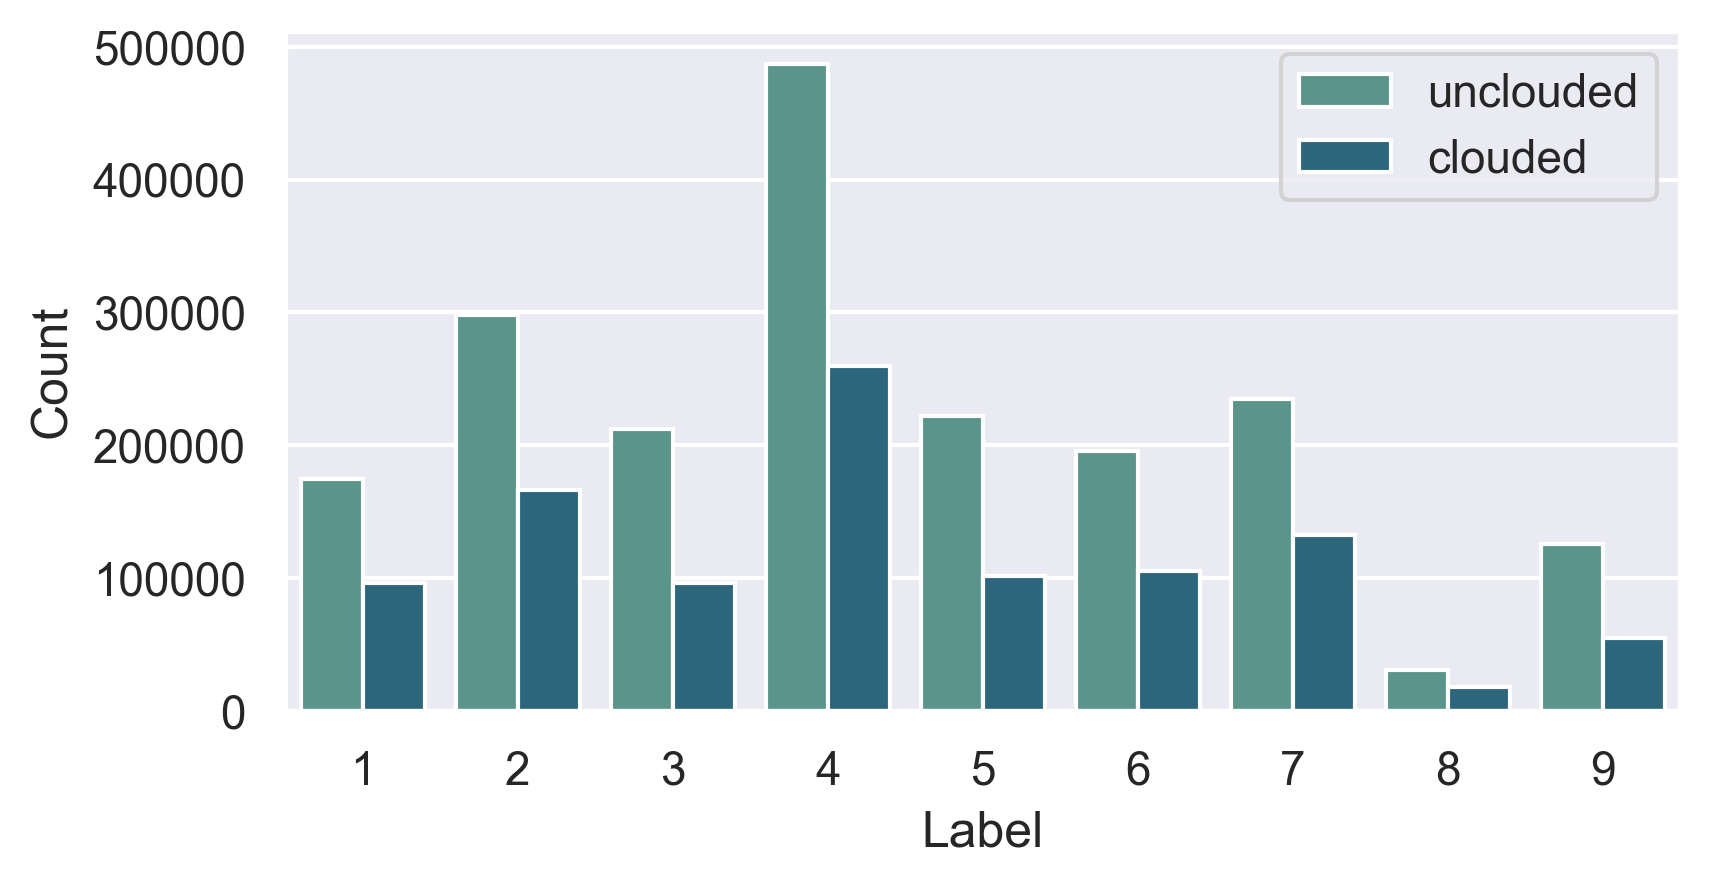

In [117]:
sns.barplot(x='Label', y='Count', hue='Variable', palette='crest', data=cloudmask_labels)
plt.legend(title='', loc='upper right');